### Reverse S_g to Alg_S_g

In [1]:
# import what is required

import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets

# Using the NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [22]:
var_s1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s1.mat', squeeze_me=True)['S_g1_temp']; #S_sci
var_s2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s2.mat', squeeze_me=True)['S_g2_temp']; #S_sci
S_g1_mode = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s1_mode.mat', squeeze_me=True)['S_g1_mode']; #S_hc
S_g2_mode = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s2_mode.mat', squeeze_me=True)['S_g2_mode']; #S_sci

# var_s1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s1_g2.mat', squeeze_me=True)['S_g1_temp']; #S_sci
# var_s2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s2_g2.mat', squeeze_me=True)['S_g2_temp']; #S_sci
# S_g1_mode = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s1_mode_g2.mat', squeeze_me=True)['S_g1_mode']; #S_hc
# S_g2_mode = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/var_s2_mode_g2.mat', squeeze_me=True)['S_g2_mode']; #S_sci


print(f'shape:{(var_s1.shape)}, {(S_g1_mode.shape)}, type:{type(var_s2)}')

shape:(200, 76, 50), (200, 76), type:<class 'numpy.ndarray'>


In [23]:
group_label = ['Healthy Control', 'Spinal Cord Injury']
analysis = "ALL"

In [14]:
# import numpy as np
# from scipy.stats import ttest_ind

# # Set the number of Monte Carlo iterations
# num_iterations = 10

# # Initialize p-value difference matrix
# p_value_diff = np.zeros((200, 200))

# # # Generate some sample data for demonstration
# # var_s1 = np.random.randn(200, 76, 50)  # Sample data for var_s1
# # var_s2 = np.random.randn(200, 61, 50)  # Sample data for var_s2

# # Loop through each pair of variables (i, j)
# for i in range(200):
#     for j in range(i + 1, 200):
#         # Perform statistical test (e.g., t-test) between variables i and j
#         p_values = []
#         for _ in range(num_iterations):
#             # Randomly select indices for each variable set
#             idx1 = np.random.choice(76, 50, replace=False)
#             idx2 = np.random.choice(61, 50, replace=False)
            
#             # Extract variables i and j from each set
#             var_i_s1 = var_s1[i, idx1]
#             var_j_s1 = var_s1[j, idx1]
#             var_i_s2 = var_s2[i, idx2]
#             var_j_s2 = var_s2[j, idx2]
            
#             # Perform the statistical test (e.g., t-test)
#             _, p_value_s1 = ttest_ind(var_i_s1, var_j_s1)
#             _, p_value_s2 = ttest_ind(var_i_s2, var_j_s2)
            
#             # Calculate absolute difference in p-values
#             p_values.append(abs(p_value_s1 - p_value_s2))
        
#         # Calculate p-value difference
#         p_value_diff[i, j] = np.mean(p_values)
#         p_value_diff[j, i] = p_value_diff[i, j]  # Symmetric matrix

# # Display the results
# # print("P-value difference matrix:")
# # print(p_value_diff)


In [15]:
# print(f'shape:{(p_value_diff.shape)}, type:{type(p_value_diff)}')

# pv_array_thr = np.copy(p_value_diff)
# # threshold p-value by 0.05 
# pv_array_thr[pv_array_thr > 0.05] = 0

In [28]:
import numpy as np
from community import community_louvain
from joblib import Parallel, delayed
from scipy.stats import mode
from scipy.stats import ranksums
   

# def perm_test_allegiance1(s1, s2, nmc):
#     n, k = s1.shape[1], 0
#     p_value = np.zeros((200, 200))
    
#     for i in range(nmc):
#         # Permute/shuffle community assignment among both groups
#         combined = np.concatenate((s1, s2), axis=1)
#         np.random.shuffle(combined)
        
#         sp1, sp2 = combined[:, :n, :], combined[:, n:, :]
        
#         # Calculate allegiance matrices for permuted groups
#         alg_sp1 = communitymeasures.allegiance(mode(sp1, axis=2))
#         alg_sp2 = communitymeasures.allegiance(mode(sp2, axis=2))
# #         alg_sp1 = np.mean(sp1, axis=2)  # Assuming allegiance calculation is mean along the third axis
# #         alg_sp2 = np.mean(sp2, axis=2)
        
#         # Calculate the difference between allegiance matrices
#         diff = np.abs(alg_sp2 - alg_sp1)
        
#         # Update p_value matrix
#         p_value += diff < np.abs(np.mean(alg_sp2, axis=2) - np.mean(alg_sp1, axis=2))
        
#         if i % 10 == 0:
#             print('permutation #: ', i)
    
#     return p_value / nmc


def perm_test_allegiance2(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    
    print(f'n,k: {n, k, s1.shape[2]}')
    alg_s1 = []
    alg_s2 = []
    for x in range(np.shape(s1)[2]):
        alg_s1.append(communitymeasures.allegiance(s1[:,:,x]))
        alg_s2.append(communitymeasures.allegiance(s2[:,:,x]))
        
    #alg_s1_m = np.mean(alg_s1, axis=0)
    #alg_s2_m = np.mean(alg_s2, axis=0)
    #alg_s1_m, _ = mode(alg_s1, axis=0)
    #alg_s2_m, _ = mode(alg_s2, axis=0)
    
    alg_s1 = np.array(alg_s1)
    alg_s2 = np.array(alg_s2)
    
    print(f'alg_s: {(alg_s1.shape), (alg_s2.shape)}')
    #print(f'mean alg_s: {(alg_s1_m.shape), (alg_s2_m.shape)}')
    diff = np.abs(alg_s2 - alg_s1)
    
    #alg_s1_array = np.array(alg_s1_m)
    #alg_s2_array = np.array(alg_s2_m)

    # Compute the absolute difference element-wise
    #diff = np.abs(alg_s2_array - alg_s1_array)
    print(f'diff alg_s2_m: {(diff.shape), type(diff)}')
    
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        print(f'sp1, sp2: {(sp1.shape), (sp2.shape)}')
        alg_sp1 = []
        alg_sp2 = []
        for y in range(np.shape(s1)[2]):
            alg_sp1.append(communitymeasures.allegiance(sp1[:,:,y]))
            alg_sp2.append(communitymeasures.allegiance(sp2[:,:,y]))
        #alg_sp1_m = np.mean(alg_sp1, axis=0)
        #alg_sp2_m = np.mean(alg_sp2, axis=0)
        
        #alg_sp1_m = communitymeasures.allegiance(sp1)
        #alg_sp2_m = communitymeasures.allegiance(sp2)
    
        #alg_sp1_m, _ = mode(alg_sp1, axis=0)
        #alg_sp2_m, _ = mode(alg_sp2, axis=0)
        
        alg_sp1 = np.array(alg_sp1)
        alg_sp2 = np.array(alg_sp2)
        
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc


def perm_test_allegiance1(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    print(f'n,k: {n, k}')
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    diff = np.abs(alg_s2 - alg_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

In [24]:
def perm_test_allegiance_new(s1_mode, s2_mode, s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    print(f'n,k: {n, k}')
    
    alg_s1 = []
    alg_s2 = []
    for x in range(np.shape(s1)[2]):
        alg_s1.append(communitymeasures.allegiance(s1[:,:,x]))
        alg_s2.append(communitymeasures.allegiance(s2[:,:,x]))
        
    alg_s1_m = np.mean(alg_s1, axis=0)
    alg_s2_m = np.mean(alg_s2, axis=0)
    
    diff = np.abs(alg_s2_m - alg_s1_m)
    print(f'diff alg_s2_m: {(diff.shape), type(diff)}')
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1_mode, s2_mode), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc, alg_s1_m, alg_s2_m

In [25]:
p_value, alg_s1, alg_s2 = perm_test_allegiance_new(S_g1_mode, S_g2_mode, var_s1, var_s2, 100)   
print(f'shape:{(p_value.shape)}, type:{type(p_value)}')


n,k: (76, 0)
diff alg_s2_m: ((200, 200), <class 'numpy.ndarray'>)
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
shape:(200, 200), type:<class 'numpy.ndarray'>


In [3]:
# from joblib import Parallel, delayed
# import numpy as np

# def perm_test_allegiance1_single_iteration(s1, s2, diff):
#     n, k = np.shape(s1)[1], 0

#     if s1.ndim == 2:
#         print("2-dimensional")
#         alg_s1 = communitymeasures.allegiance(s1)
#         alg_s2 = communitymeasures.allegiance(s2)
#     else:
#         print("The array is not 2-dimensional")
#         alg_s1 = []
#         alg_s2 = []
#         for x in range(np.shape(s1)[2]):
#             alg_s1.append(communitymeasures.allegiance(s1[:,:,x]))
#             alg_s2.append(communitymeasures.allegiance(s2[:,:,x]))
#         alg_s1 = np.array(alg_s1)
#         alg_s2 = np.array(alg_s2)
    
#     print(f'alg_s: {(alg_s1.shape), (alg_s2.shape)}')
    
#     sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#     sp1, sp2 = sp[:,:n], sp[:,n:]
    
#     if s1.ndim == 2:
#         print("2-dimensional")
#         alg_sp1 = communitymeasures.allegiance(sp1)
#         alg_sp2 = communitymeasures.allegiance(sp2)
#     else:
#         print("The array is not 2-dimensional")
#         alg_sp1 = []
#         alg_sp2 = []
#         for x in range(np.shape(s1)[2]):
#             alg_sp1.append(communitymeasures.allegiance(s1[:,:,x]))
#             alg_sp2.append(communitymeasures.allegiance(s2[:,:,x]))
#         alg_sp1 = np.array(alg_sp1)
#         alg_sp2 = np.array(alg_sp2)
    
#     k += diff < np.abs(alg_sp2 - alg_sp1)
#     return k


# def perm_test_allegiance_par(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
    
#     if s1.ndim == 2:
#         print("2-dimensional")
#         alg_s1 = communitymeasures.allegiance(s1)
#         alg_s2 = communitymeasures.allegiance(s2)
#     else:
#         print("The array is not 2-dimensional")
#         alg_s1 = []
#         alg_s2 = []
#         for x in range(np.shape(s1)[2]):
#             alg_s1.append(communitymeasures.allegiance(s1[:,:,x]))
#             alg_s2.append(communitymeasures.allegiance(s2[:,:,x]))
#         alg_s1 = np.array(alg_s1)
#         alg_s2 = np.array(alg_s2)
    
#     diff = np.abs(alg_s2 - alg_s1)
#     results = Parallel(n_jobs=-1)(delayed(perm_test_allegiance1_single_iteration)(s1, s2, diff) for _ in range(nmc))
#     return sum(results) / nmc


In [9]:
# from joblib import Parallel, delayed
# import numpy as np

# def compute_allegiance(s_array):
#     return [communitymeasures.allegiance(s_array[:,:,x]) for x in range(np.shape(s_array)[2])]

# def perm_test_allegiance_parallel(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
    
#     print(f'n,k: {n, k, s1.shape[2]}')
    
#     alg_s1 = Parallel(n_jobs=-1)(delayed(compute_allegiance)(s1) for _ in range(nmc))
#     alg_s2 = Parallel(n_jobs=-1)(delayed(compute_allegiance)(s2) for _ in range(nmc))
    
#     alg_s1 = np.array(alg_s1)
#     alg_s2 = np.array(alg_s2)
    
#     print(f'alg_s: {(alg_s1.shape), (alg_s2.shape)}')
    
#     diff = np.abs(alg_s2 - alg_s1)
    
#     print(f'diff alg_s2_m: {(diff.shape), type(diff)}')
    
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         print(f'sp1, sp2: {(sp1.shape), (sp2.shape)}')
        
#         alg_sp1 = Parallel(n_jobs=-1)(delayed(compute_allegiance)(sp1) for _ in range(np.shape(s1)[2]))
#         alg_sp2 = Parallel(n_jobs=-1)(delayed(compute_allegiance)(sp2) for _ in range(np.shape(s1)[2]))
        
#         alg_sp1 = np.array(alg_sp1)
#         alg_sp2 = np.array(alg_sp2)
        
#         k += diff < np.abs(alg_sp2 - alg_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
    
#     return k / nmc


In [6]:
# p_value2 = perm_test_allegiance_par(var_s1, var_s2, 10) 
# p_value3 = perm_test_allegiance_parallel(var_s1, var_s2, 10) 

# p_value1 = perm_test_allegiance2(var_s1, var_s2, 10) 
# p_value = perm_test_allegiance1(var_s1[:,:,5], var_s2[:,:,1], 10) 

# print(f'shape:{(p_value1.shape)}, type:{type(p_value1)}')
# print(f'shape:{(p_value.shape)}, type:{type(p_value)}')

In [60]:
# import numpy as np
# from scipy.stats import ttest_ind

# # Example data (replace this with your 200x200x50 array)
# # data = np.random.rand(200, 200, 50)
# p_value_sh = np.copy(p_value)
# # Reshape the data into a 40000x50 array
# reshaped_data = p_value_sh.reshape(-1, 50)

# # Perform t-test for each element or group of elements
# # For example, comparing group 1 (first 25 p-values) with group 2 (last 25 p-values)
# group1 = reshaped_data[:, :25]
# group2 = reshaped_data[:, 25:]
# t_values, p_values = ttest_ind(group1, group2, axis=1)

# # Reshape the resulting p-values back into the 200x200 grid format
# p_values_grid = p_values.reshape(200, 200)
# print(f'shape:{(p_values_grid.shape)}, type:{type(p_values_grid)}')
# # Now you have a 200x200 array of p-values representing the statistical significance


shape:(200, 200), type:<class 'numpy.ndarray'>


In [26]:
import numpy as np

# Assuming arr is your 200x200 array
# Create a copy of the original array to avoid overriding
p_value_thr = np.copy(p_value)

# Thresholding values

p_value_thr[p_value_thr < 0.05] = 0
p_value_thr[p_value_thr > 0.05] = 1

p_value_bin = np.copy(p_value_thr)
p_value_bin = 1 - p_value_bin

print(f'count: {np.sum(p_value < 0.05)}')
# threshold_count = np.sum(arr_thresholded <= 0.05)

# p_value_m = np.mean(p_value, axis=0)
# p_value_m, _ = mode(p_value1, axis=0)
# print(f'shape:{(p_value_m.shape)}, type:{type(p_value_m)}')

# p_value_thr = np.copy(p_value)
# # threshold p-value by 0.05 
# p_value_thr[p_value_thr > 0.05] = 0

count: 12650


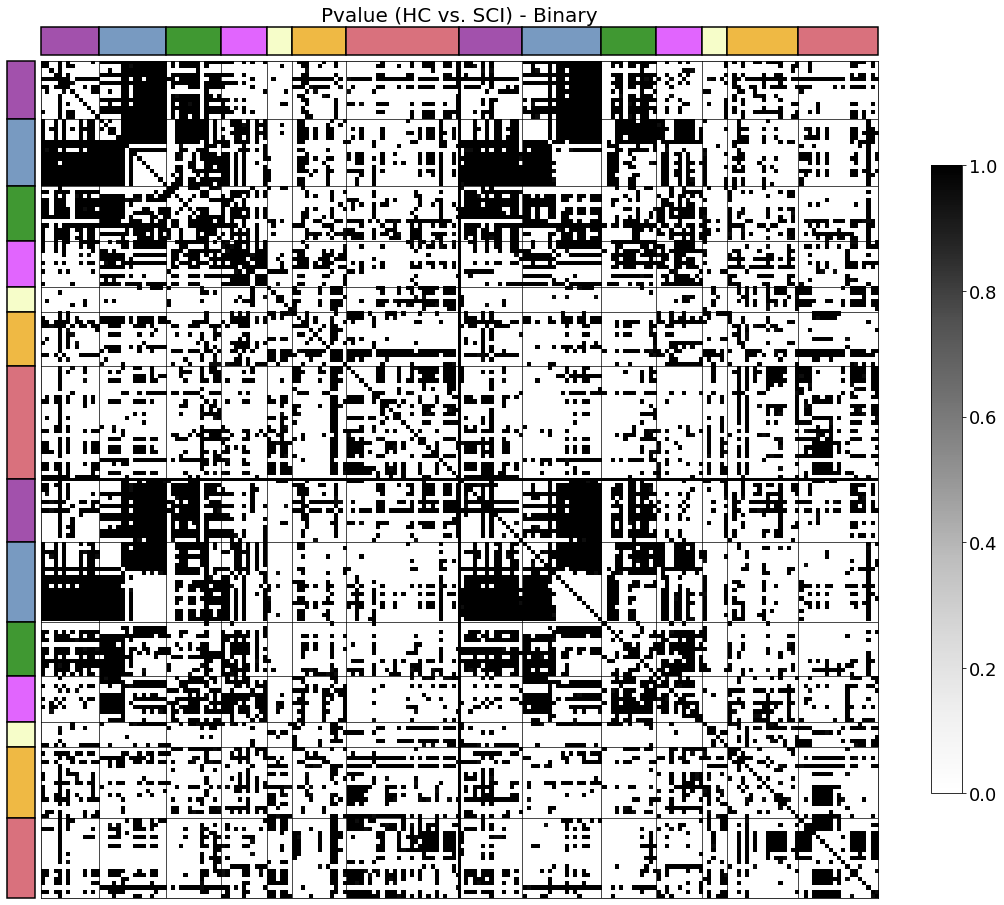

In [28]:
# plot pvalue
cmap='Greys' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# Healthy Control p_value1 p_value[1,:,:] p_value_m alg_s1, alg_s2
f = plt.figure(figsize=(19,15) )
plt.matshow(p_value_bin, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title('Pvalue (HC vs. SCI) - Binary', fontsize=20, y=1.04)
# plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
# plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='black',linewidth=3)
plt.axhline(y=100-0.5,color='black',linewidth=3)
# Draw grid lines
plt.grid(color='black', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/pvalue_diff_50x.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

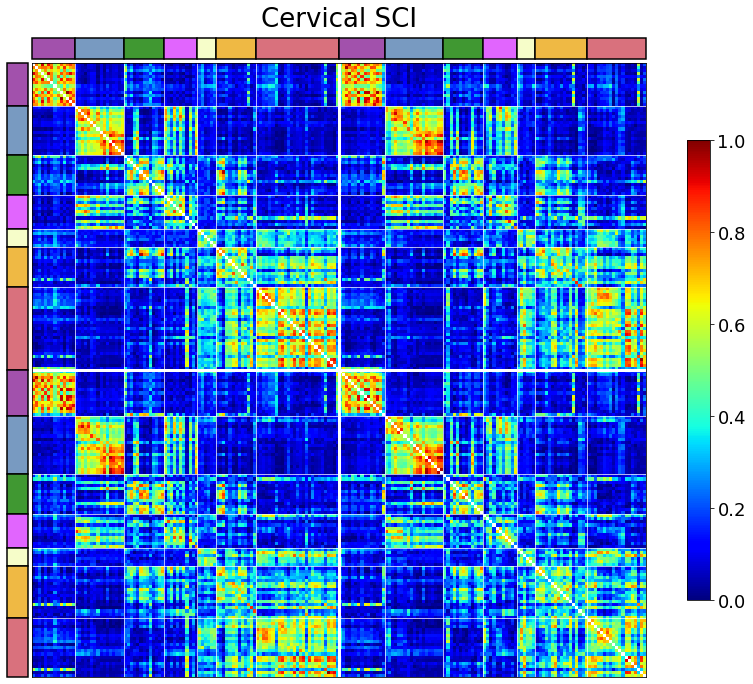

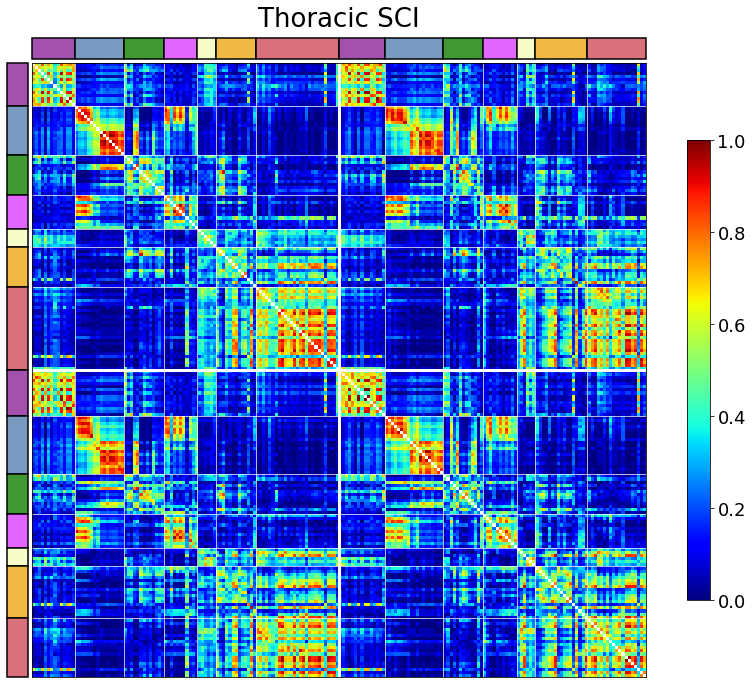

In [9]:
#%% Allegiance matrix plots [Consensus (Mean)]  +" [Consensus (Mode x50)]" [Consensus (Mode-100)]
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# Group 1 alg_s1, alg_s2
f = plt.figure(figsize=(15,11))
plt.matshow(alg_s1, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title("Cervical SCI", fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb=plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white', linewidth=3)
plt.axhline(y=100-0.5,color='white', linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance1_hcsci_50x.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# Group 2  [Consensus (Mean)] [Consensus (Mode)] +" [Consensus (Mean)]" alg_s1, alg_s2
f = plt.figure(figsize=(15,11))
plt.matshow(alg_s2, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title("Thoracic SCI", fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance2_hcsci_50x.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

## recruitment and integration coeeficiencts for each brain region

node_coords = np.array([(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)])

